In [6]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

from activation_functions import Tanh, Sigmoid
from mse import mse, mse_derivative
from mlp import Dense, train, predict
from utils import get_config_params, get_data, get_training_amount
from mpl_toolkits.mplot3d import Axes3D

In [31]:
config = {
    "ej": 2,
    "learning_rate": 0.01,
    "training_percentage": 0.5,
    "max_epochs": 5000,
    "bias": 1,
    "beta": 1,
    "epsilon": 0.5,
    "optimizer": "ADAM"
}

In [8]:
ej, learning_rate, training_percentage, max_epochs, bias, beta, epsilon, optimizer = get_config_params(config)

input_data, expected_data = get_data(2)
training_amount = get_training_amount(len(input_data), training_percentage)

flattened_input = []
for i in range(len(input_data)):
    flattened_input.append([item for sublist in input_data[i] for item in sublist])

training_set = flattened_input[:training_amount]
training_expected = expected_data[:training_amount]
testing_set =  np.reshape(flattened_input[training_amount:], (len(input_data)-training_amount, 35, 1))
testing_expected = expected_data[training_amount:]
X = np.reshape(training_set, (training_amount, 35, 1))
Y = np.reshape(training_expected, (training_amount, 1, 1))

In [9]:
network = [
        Dense(35, 32, optimizer_type=optimizer),
        Sigmoid(),
        Dense(32, 2,optimizer_type=optimizer),
        Sigmoid()
    ]
network


In [10]:
# train
train(network, mse, mse_derivative, X, Y, epochs=10000, verbose=False)

In [11]:
points = []
for i in range(len(testing_set)):
    z = predict(network, testing_set[i])
    points.append([testing_set[i], testing_expected[i], z[0,0]])
for point in points:
    print(f"Expected:{point[1]} Result:{point[2]}")

Expected:1 Result:0.008444035790337086
Expected:0 Result:0.9420989119871104
Expected:1 Result:0.0031472167048034946
Expected:0 Result:0.9188334355914449
Expected:1 Result:0.062197047400724244


#### Graficos

In [34]:
with open('./config.json', 'r') as f:
        config = json.load(f)

ej, learning_rate, training_percentage, max_epochs, bias, beta, epsilon, optimizer = get_config_params(config)
input_data, expected_data = get_data(ej)

flattened_input = []

for i in range(len(input_data)):
    flattened_input.append([item for sublist in input_data[i] for item in sublist])

# TESTING_AMOUNT = 5 # Dejamos fijo el testing amount?
# testing_set =  np.reshape(flattened_input[TESTING_AMOUNT:], (len(input_data)-TESTING_AMOUNT, 35, 1))
# testing_expected = expected_data[TESTING_AMOUNT:]

results = []

for iteration in range(10):
    for optimizer in ["ADAM", "GRADIENT_DESCENT"]:
        for training_percentage in [0.2, 0.4, 0.6, 0.8]:
            print(f"Training Percentage: {training_percentage} - Iteration: {iteration}")
            
            training_amount = get_training_amount(len(input_data), training_percentage)

            training_set = flattened_input[:training_amount]
            training_expected = expected_data[:training_amount]

            testing_set =  np.reshape(flattened_input[training_amount:], (len(input_data)-training_amount, 35, 1))
            testing_expected = expected_data[training_amount:]
            
            X = np.reshape(flattened_input[:training_amount], (training_amount, 35, 1))
            Y = np.reshape(expected_data[:training_amount], (training_amount, 1, 1))
                
            network = [
                Dense(35, 32, learning_rate, optimizer),
                Sigmoid(),
                Dense(32, 2, learning_rate, optimizer),
                Sigmoid()
            ]

            train(network, mse, mse_derivative, X, Y, epochs=max_epochs, verbose=False)

            points = []
            for i in range(len(testing_set)):
                z = predict(network, testing_set[i])
                points.append([testing_set[i], testing_expected[i], z[0,0]])

            correct_predictions = 0

            for point in points:
                # print(f"Expected:{point[1]} Result:{round(point[2])}")
                if point[1] == round(point[2]):
                    correct_predictions += 1
            
            accuracy = (correct_predictions / len(testing_set)) * 100
            # print(f"Accuracy: {accuracy}%")

            results.append({"optimizer": optimizer, "training_percentage": training_percentage, "accuracy": accuracy, "iteration": iteration})
    
df = pd.DataFrame(results)

Training Percentage: 0.2 - Iteration: 0
Training Percentage: 0.4 - Iteration: 0
Training Percentage: 0.6 - Iteration: 0
Training Percentage: 0.8 - Iteration: 0
Training Percentage: 0.2 - Iteration: 0
Training Percentage: 0.4 - Iteration: 0
Training Percentage: 0.6 - Iteration: 0
Training Percentage: 0.8 - Iteration: 0
Training Percentage: 0.2 - Iteration: 1
Training Percentage: 0.4 - Iteration: 1
Training Percentage: 0.6 - Iteration: 1
Training Percentage: 0.8 - Iteration: 1
Training Percentage: 0.2 - Iteration: 1
Training Percentage: 0.4 - Iteration: 1
Training Percentage: 0.6 - Iteration: 1
Training Percentage: 0.8 - Iteration: 1
Training Percentage: 0.2 - Iteration: 2
Training Percentage: 0.4 - Iteration: 2
Training Percentage: 0.6 - Iteration: 2
Training Percentage: 0.8 - Iteration: 2
Training Percentage: 0.2 - Iteration: 2
Training Percentage: 0.4 - Iteration: 2
Training Percentage: 0.6 - Iteration: 2
Training Percentage: 0.8 - Iteration: 2
Training Percentage: 0.2 - Iteration: 3


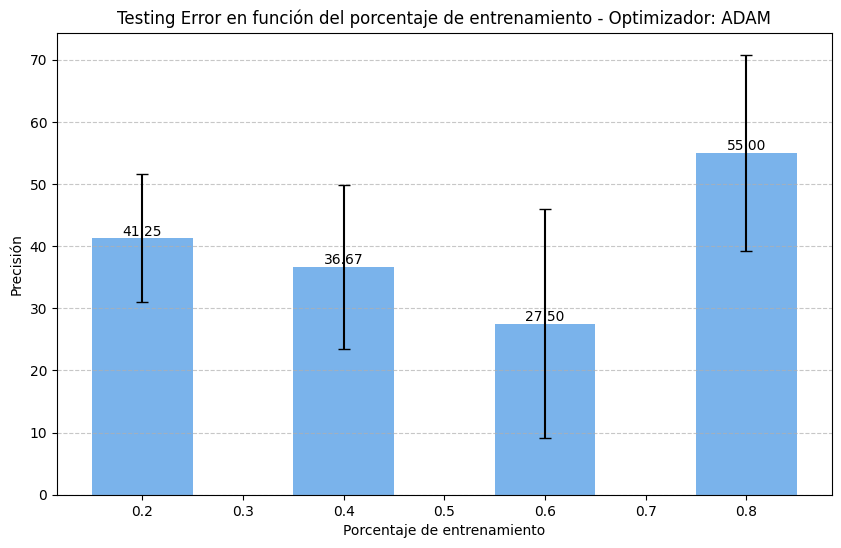

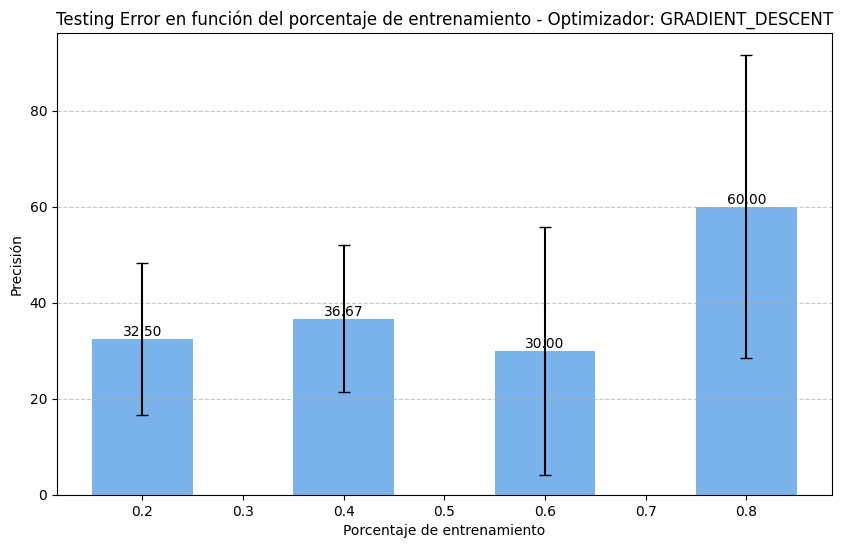

In [35]:
for optimizer in df["optimizer"].unique():
    subset = df[df["optimizer"] == optimizer]
    plt.figure(figsize=(10, 6))

    for tp in subset["training_percentage"].unique():
        tp_subset = subset[subset["training_percentage"] == tp]
        mean_tp_subset = tp_subset["accuracy"].mean()
        std_error = tp_subset["accuracy"].std()
        plt.bar(tp, mean_tp_subset, yerr=std_error,capsize=4, width=0.1, color='#7ab3eb')
        plt.text(tp, mean_tp_subset, f"{mean_tp_subset:.2f}", ha='center', va='bottom')


    plt.xlabel('Porcentaje de entrenamiento')
    plt.ylabel('Precisión')
    plt.title(f'Testing Error en función del porcentaje de entrenamiento - Optimizador: {optimizer}')


    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()